In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
!pip install catboost
!pip install optuna catboost lightgbm xgboost scikit-learn pandas numpy

📊 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2401 non-null   int64  
 1   Name                    2401 non-null   object 
 2   Age                     2401 non-null   int64  
 3   Gender                  2401 non-null   object 
 4   Location                2401 non-null   object 
 5   School_Grade            2401 non-null   object 
 6   Daily_Usage_Hours       2401 non-null   float64
 7   Sleep_Hours             2401 non-null   float64
 8   Academic_Performance    2401 non-null   int64  
 9   Social_Interactions     2401 non-null   int64  
 10  Exercise_Hours          2401 non-null   float64
 11  Anxiety_Level           2401 non-null   int64  
 12  Depression_Level        2401 non-null   int64  
 13  Self_Esteem             2401 non-null   int64  
 14  Parental_Control       

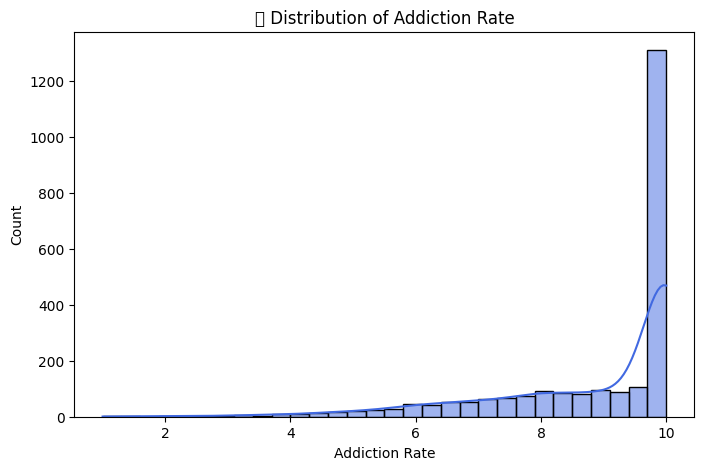

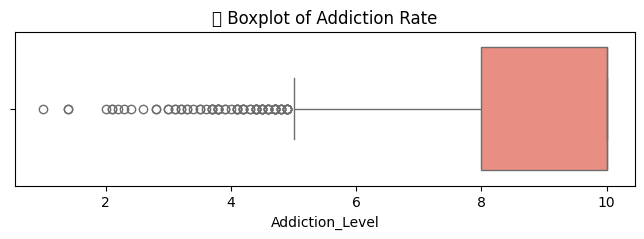

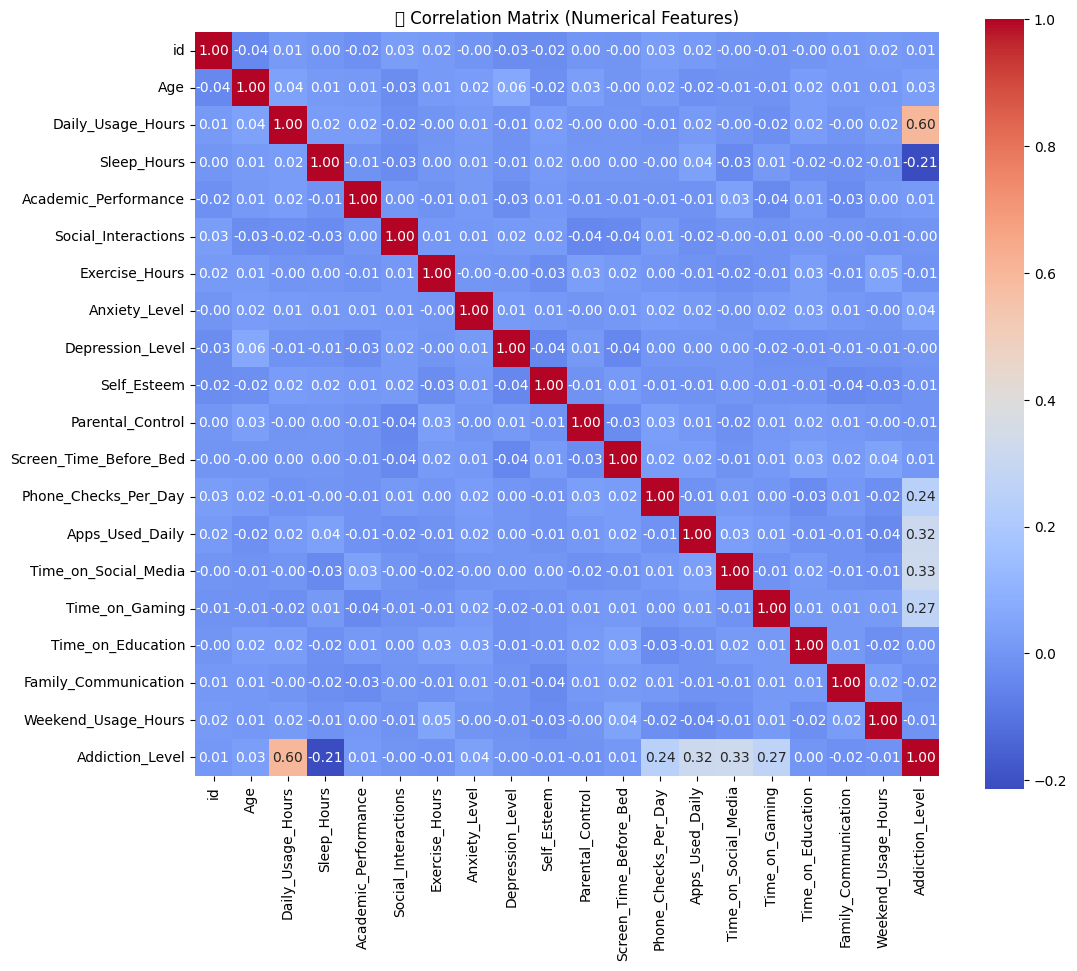


📈 Top Features Correlated with Addiction Rate:
Addiction_Level           1.000000
Daily_Usage_Hours         0.598123
Time_on_Social_Media      0.326677
Apps_Used_Daily           0.316630
Time_on_Gaming            0.269340
Phone_Checks_Per_Day      0.242269
Anxiety_Level             0.035516
Age                       0.030981
Academic_Performance      0.014847
id                        0.006998
Screen_Time_Before_Bed    0.006196
Time_on_Education         0.000257
Social_Interactions      -0.002022
Depression_Level         -0.002660
Parental_Control         -0.005800
Exercise_Hours           -0.008873
Self_Esteem              -0.009529
Weekend_Usage_Hours      -0.010394
Family_Communication     -0.015789
Sleep_Hours              -0.213610
Name: Addiction_Level, dtype: float64


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load Data
df = pd.read_csv("train.csv")  # Replace with your actual filename

# 🔎 Basic Info
print("📊 Data Overview:")
print(df.info())
print("\n🔢 First 5 Rows:")
print(df.head())

# 🔍 Missing Values
print("\n🚨 Missing Values Count:")
print(df.isnull().sum())

print("\n🚨 Missing Values Percentage:")
print((df.isnull().sum() / len(df)) * 100)

# 🧬 Data Types
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\n🧾 Categorical Columns:", list(categorical_cols))
print("🔢 Numerical Columns:", list(numerical_cols))

# 🎯 Target Distribution
TARGET = "Addiction_Level"  # Change if your target column is different

if TARGET in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[TARGET], bins=30, kde=True, color="royalblue")
    plt.title("📈 Distribution of Addiction Rate")
    plt.xlabel("Addiction Rate")
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[TARGET], color="salmon")
    plt.title("📦 Boxplot of Addiction Rate")
    plt.show()
else:
    print(f"⚠️ Column '{TARGET}' not found. Please update the target variable name.")

# 🧊 Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("📌 Correlation Matrix (Numerical Features)")
plt.show()

# 🔝 Top Correlated Features with Target
if TARGET in correlation_matrix.columns:
    cor_target = correlation_matrix[TARGET].sort_values(ascending=False)
    print("\n📈 Top Features Correlated with Addiction Rate:")
    print(cor_target)


In [ ]:
# 📦 Install required libraries
!pip install xgboost scikit-learn --quiet

# 📚 Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("train.csv")
df = df.drop(['id', 'Name'], axis=1, errors='ignore')

# Define target and features
target = 'Addiction_Level'
X = df.drop(columns=[target])
y = df[target]

# Split columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

# Preprocessor: encode + scale
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Fit and transform
X_processed = preprocessor.fit_transform(X)

# Scale X_processed again for Lasso/ElasticNet
X_processed_scaled = X_processed

# Define models
models = {
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Lasso": LassoCV(cv=5, random_state=42),
    "ElasticNet": ElasticNetCV(cv=5, random_state=42)
}

# Store feature importances
feature_scores = {}

# Get column names after encoding
encoded_feature_names = (
    preprocessor.named_transformers_['num'].get_feature_names_out(numerical_cols).tolist()
    if numerical_cols else []
)
if categorical_cols:
    encoded_feature_names += preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()

# Fit each model and extract importance
for name, model in models.items():
    if name in ["Lasso", "ElasticNet"]:
        model.fit(X_processed_scaled, y)
        importances = np.abs(model.coef_)
    else:
        model.fit(X_processed, y)
        importances = model.feature_importances_

    feature_scores[name] = pd.Series(importances, index=encoded_feature_names).sort_values(ascending=False)

# 📊 Print top 10 features
for name, scores in feature_scores.items():
    print(f"\n=== {name} Top Features ===")
    print(scores.head(10))



=== XGBoost Top Features ===
Daily_Usage_Hours            0.142181
Apps_Used_Daily              0.102140
Time_on_Social_Media         0.095777
Time_on_Gaming               0.095707
Location_Beni Oulbane        0.089815
Location_Tagra               0.061576
Phone_Checks_Per_Day         0.052708
Sleep_Hours                  0.032991
Location_Beni Douala         0.028793
Phone_Usage_Purpose_Other    0.022432
dtype: float32

=== RandomForest Top Features ===
Daily_Usage_Hours         0.422176
Time_on_Social_Media      0.133745
Time_on_Gaming            0.109589
Apps_Used_Daily           0.103306
Phone_Checks_Per_Day      0.078861
Sleep_Hours               0.059411
Academic_Performance      0.006789
Time_on_Education         0.006412
Weekend_Usage_Hours       0.006350
Screen_Time_Before_Bed    0.005821
dtype: float64

=== GradientBoosting Top Features ===
Daily_Usage_Hours       0.501079
Time_on_Social_Media    0.134275
Apps_Used_Daily         0.117322
Time_on_Gaming          0.113989
Phon

In [ ]:
!pip install xgboost lightgbm catboost scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import numpy as np

# ✅ Load your data
df = pd.read_csv("train.csv")  # change path if needed
core_features = [
    "Daily_Usage_Hours",
    "Apps_Used_Daily",
    "Time_on_Social_Media",
    "Time_on_Gaming",
    "Phone_Checks_Per_Day",
    "Sleep_Hours"
]

# 🎯 Define target
X = df[core_features]
y = df["Addiction_Level"]  # replace with actual target column name

# 📊 Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📦 Models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

# 🔁 Train & Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    results[name] = mse
    print(f"{name} MSE: {mse:.4f}")

# 🥇 Best model
best_model = min(results, key=results.get)
print(f"\nBest Model: {best_model} with MSE: {results[best_model]:.4f}")


Linear Regression MSE: 0.6269
Ridge MSE: 0.6269
Lasso MSE: 1.4374
ElasticNet MSE: 1.2836
Random Forest MSE: 0.2393
Gradient Boosting MSE: 0.2476
XGBoost MSE: 0.2292
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 8.865781
LightGBM MSE: 0.1368
CatBoost MSE: 0.0509

Best Model: CatBoost with MSE: 0.0509


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import optuna

# Step 1: Split data for Optuna tuning
X_train, X_val, y_train, y_val = train_test_split(X[core_features], y, test_size=0.2, random_state=42)

# Step 2: Define Optuna objective
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 300, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10.0),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli']),
        'loss_function': 'RMSE',
        'early_stopping_rounds': 100,
        'verbose': 0
    }

    if params['bootstrap_type'] == 'Bayesian':
        params['bagging_temperature'] = trial.suggest_float('bagging_temperature', 0.01, 10.0, log=True)

    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val))
    preds = model.predict(X_val)
    mse = mean_squared_error(y_val, preds)
    return mse

# Step 3: Run Optuna search
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Step 4: Print best result
print("Best params:", study.best_params)
print("Best MSE:", study.best_value)

# Step 5: Retrain on full training data using best params
best_params = study.best_params.copy()
best_params['loss_function'] = 'MAE'
best_params['verbose'] = 100  # for better training logs

# Remove early_stopping if training on full data
best_params.pop('early_stopping_rounds', None)

# Final model trained on full data
final_model = CatBoostRegressor(**best_params)
final_model.fit(X[core_features], y)

# Optionally save model
final_model.save_model("catboost_final_model.cbm")


[I 2025-07-23 00:53:18,946] A new study created in memory with name: no-name-3257ed43-22f3-4160-b7e4-ff8161424e1c
[I 2025-07-23 00:53:20,398] Trial 0 finished with value: 0.3092963473053913 and parameters: {'iterations': 671, 'depth': 5, 'learning_rate': 0.0052811551141012944, 'l2_leaf_reg': 0.01192636210510949, 'random_strength': 9.969022304903318, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 8.19682983705359}. Best is trial 0 with value: 0.3092963473053913.
[I 2025-07-23 00:53:21,998] Trial 1 finished with value: 0.9165865518901234 and parameters: {'iterations': 618, 'depth': 6, 'learning_rate': 0.0018973432742438578, 'l2_leaf_reg': 1.0935314759057664, 'random_strength': 2.996688767567434, 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.3092963473053913.
[I 2025-07-23 00:53:22,548] Trial 2 finished with value: 0.0514546412511657 and parameters: {'iterations': 822, 'depth': 5, 'learning_rate': 0.042794400691942645, 'l2_leaf_reg': 0.03029732450462186, 'random_stre

Best params: {'iterations': 925, 'depth': 6, 'learning_rate': 0.06583592580735456, 'l2_leaf_reg': 0.40306710892183356, 'random_strength': 6.324594765346744, 'bootstrap_type': 'Bernoulli'}
Best MSE: 0.04104750726762418
0:	learn: 1.0908843	total: 1.3ms	remaining: 1.2s
100:	learn: 0.2423010	total: 98.4ms	remaining: 803ms
200:	learn: 0.1530779	total: 197ms	remaining: 709ms
300:	learn: 0.1274163	total: 291ms	remaining: 603ms
400:	learn: 0.1124863	total: 390ms	remaining: 510ms
500:	learn: 0.1032158	total: 491ms	remaining: 415ms
600:	learn: 0.0963646	total: 614ms	remaining: 331ms
700:	learn: 0.0912542	total: 711ms	remaining: 227ms
800:	learn: 0.0874609	total: 807ms	remaining: 125ms
900:	learn: 0.0843457	total: 902ms	remaining: 24ms
924:	learn: 0.0836578	total: 924ms	remaining: 0us


📊 Skewness of numerical features:
Exercise_Hours            0.444630
Time_on_Education         0.324494
Time_on_Gaming            0.262359
Screen_Time_Before_Bed    0.093579
Time_on_Social_Media      0.070950
Phone_Checks_Per_Day      0.055651
Weekend_Usage_Hours       0.029594
Sleep_Hours               0.025074
Age                       0.008372
Depression_Level          0.006962
Daily_Usage_Hours         0.004874
Family_Communication      0.003933
id                        0.000000
Parental_Control         -0.002499
Academic_Performance     -0.007806
Apps_Used_Daily          -0.014132
Social_Interactions      -0.034228
Anxiety_Level            -0.042927
Self_Esteem              -0.056938
Addiction_Level          -1.561147
dtype: float64


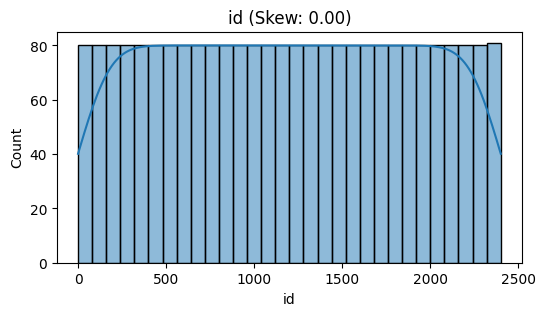

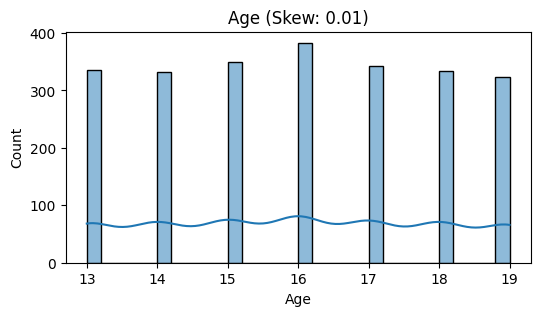

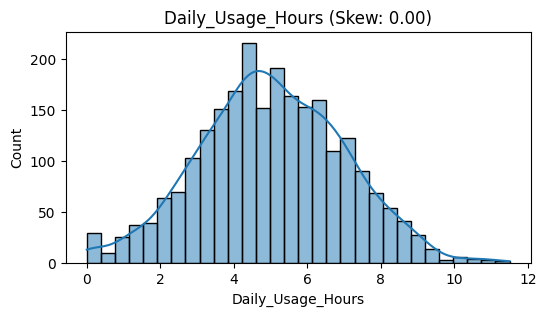

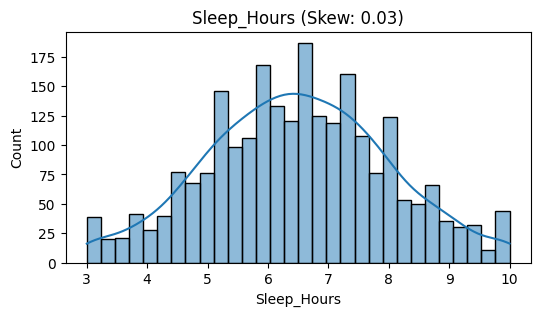

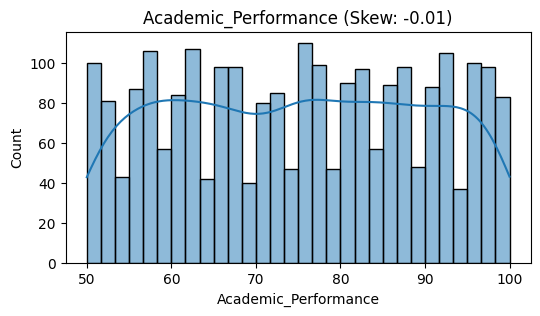

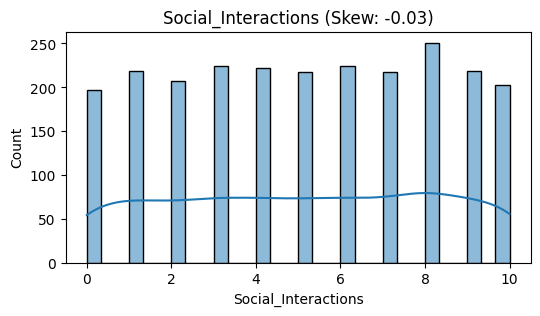

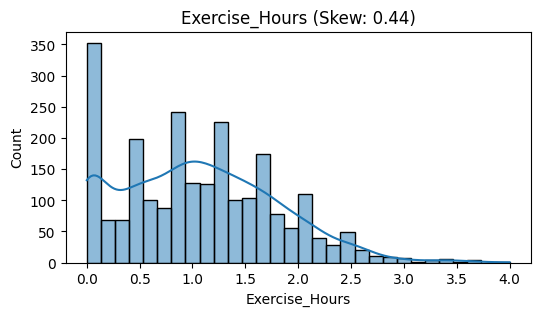

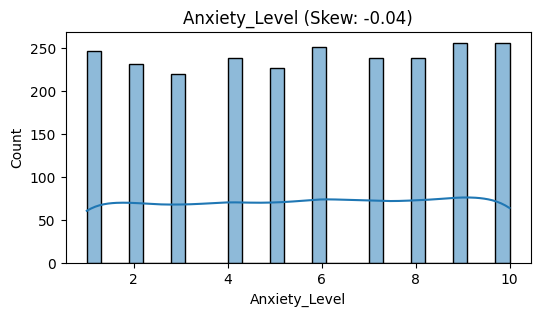

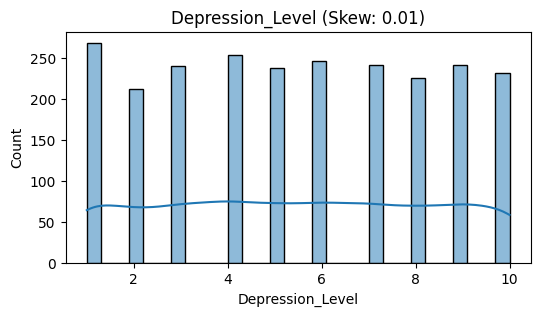

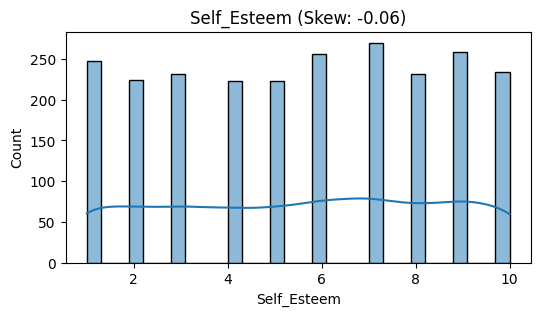

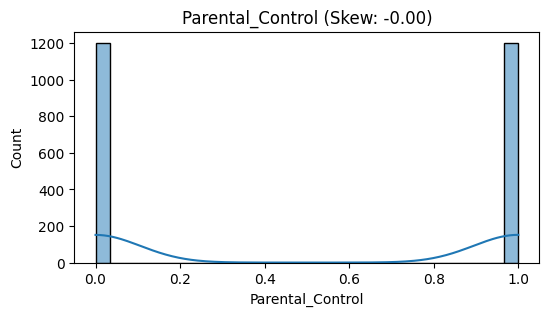

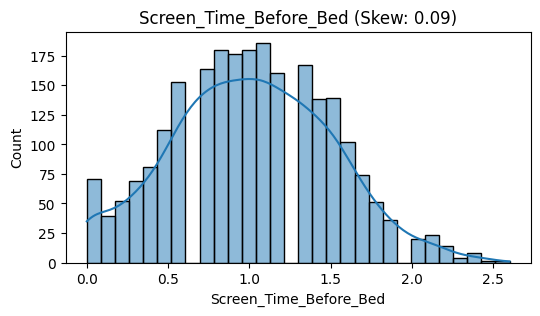

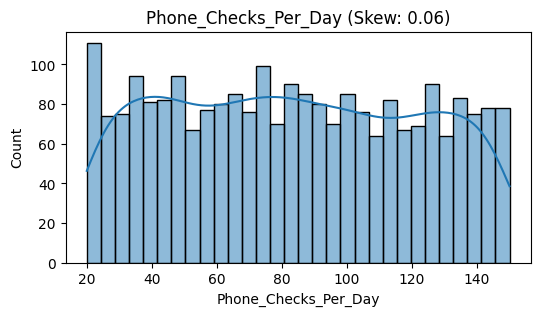

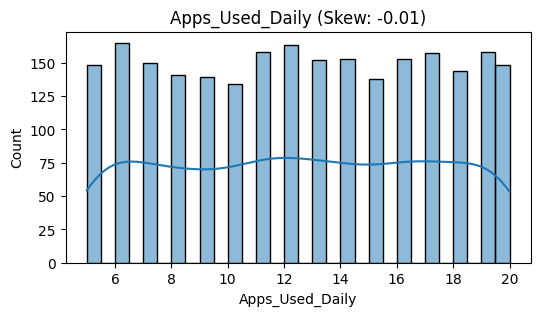

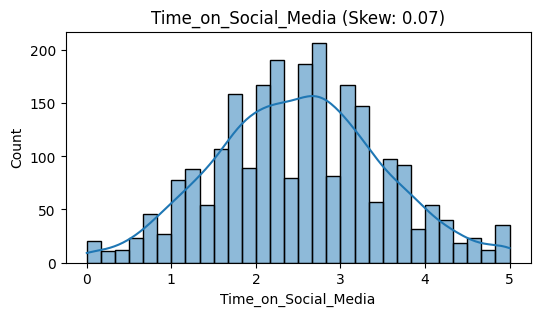

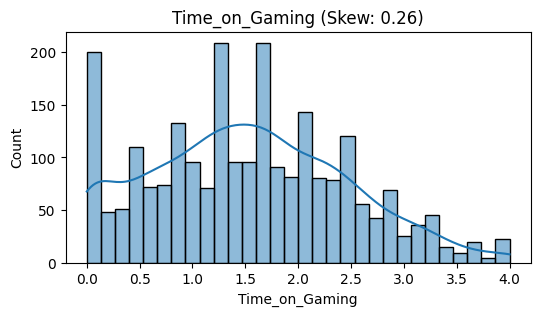

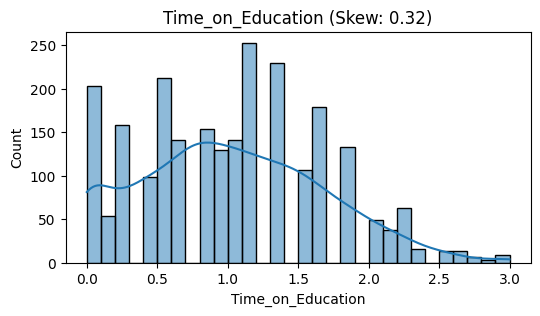

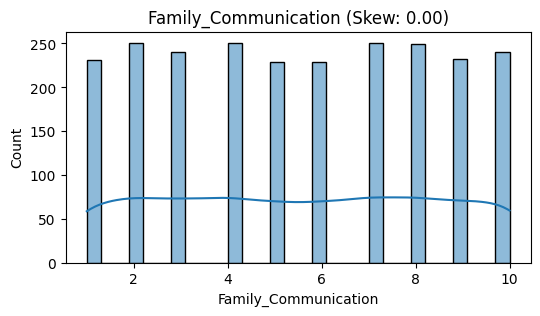

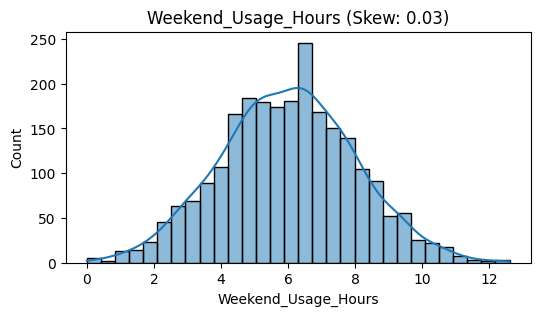

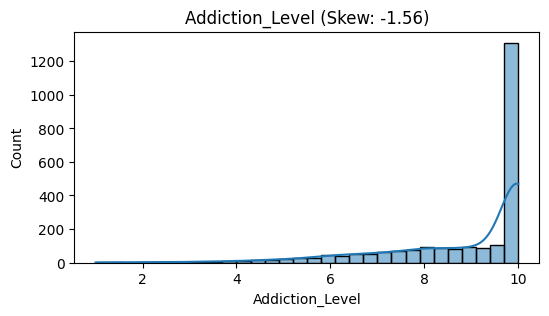

In [ ]:
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (already loaded as train_df)
numerical_cols = train_df.select_dtypes(include='number').columns

# Calculate skewness
skewness = train_df[numerical_cols].apply(skew)

# Display skewness
print("📊 Skewness of numerical features:")
print(skewness.sort_values(ascending=False))

# Optional: Visualize with histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f"{col} (Skew: {skewness[col]:.2f})")
    plt.show()


In [ ]:
!pip install optuna optuna-integration[sklearn] catboost lightgbm scikit-learn pandas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor, early_stopping
import optuna
from optuna.distributions import IntDistribution, FloatDistribution
import warnings
warnings.filterwarnings("ignore")

# 1. Load Data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

features = [
    'Daily_Usage_Hours',
    'Apps_Used_Daily',
    'Time_on_Social_Media',
    'Time_on_Gaming',
    'Phone_Checks_Per_Day',
    'Sleep_Hours'
]


X = train_df[features]
y = train_df['Addiction_Level']
X_train, X_val, y_train_raw, y_val_raw = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.log1p(y_train_raw)
y_val = np.log1p(y_val_raw)

# 2. Define CatBoost and LightGBM tuning with early stopping
def optuna_tune_catboost(name):
    def objective(trial):
        params = {
            'depth': trial.suggest_int('depth', 3, 8),
            'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
            'iterations': 1500,
            'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10),
            'random_seed': 42,
            'verbose': 0
        }
        model = CatBoostRegressor(**params)
        model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=0)
        preds = model.predict(X_val)
        return mean_squared_error(y_val, preds)

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=30)
    print(f"✅ {name} Best Params:", study.best_params)
    return CatBoostRegressor(**study.best_params, iterations=1000, random_seed=42, verbose=0)

def optuna_tune_lgbm(name):
    def objective(trial):
        params = {
            'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
            'max_depth': trial.suggest_int('max_depth', 3, 8),
            'n_estimators': 1000,
            'num_leaves': trial.suggest_int('num_leaves', 15, 50),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'random_state': 42
        }

        model = LGBMRegressor(**params)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            eval_metric='rmse',
            callbacks=[early_stopping(stopping_rounds=50)]
        )

        preds = model.predict(X_val)
        return mean_squared_error(y_val, preds)

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=30)
    print(f"✅ {name} Best Params:", study.best_params)
    return LGBMRegressor(**study.best_params, n_estimators=1000, random_state=42)

# 3. Base model tuning
catboost_best = optuna_tune_catboost("CatBoost")
lgbm_best = optuna_tune_lgbm("LightGBM")

# 4. Final estimator tuning
final_estimator = optuna_tune_catboost("Final Estimator (CatBoost)")

# 5. Stacking model
stack_model = StackingRegressor(
    estimators=[
        ('catboost', catboost_best),
        ('lgbm', lgbm_best),
    ],
    final_estimator=final_estimator,
    passthrough=True,
    n_jobs=-1
)

# 6. Bagging over stacking
bagging_stack = BaggingRegressor(
    estimator=stack_model,
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)

# 7. Fit and Evaluate
bagging_stack.fit(X_train, y_train)

# Train predictions
train_preds_log = bagging_stack.predict(X_train)
train_preds = np.expm1(train_preds_log)
train_actual = np.expm1(y_train)

# Validation predictions
val_preds_log = bagging_stack.predict(X_val)
val_preds = np.expm1(val_preds_log)
val_actual = np.expm1(y_val)

# Metrics
train_mse = mean_squared_error(train_actual, train_preds)
val_mse = mean_squared_error(val_actual, val_preds)
train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)

print(f"📈 Train MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}")
print(f"📊 Validation MSE: {val_mse:.4f}, RMSE: {val_rmse:.4f}")

# Overfitting Check
if train_rmse < val_rmse * 0.7:
    print("⚠️ Overfitting likely: Training RMSE is much lower than Validation RMSE.")
else:
    print("✅ Overfitting not detected.")

# 8. Final train and predict
bagging_stack.fit(X, np.log1p(y))
final_preds_log = bagging_stack.predict(test_df[features])
final_preds = np.expm1(final_preds_log)

# 9. Submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'Addiction_Level': final_preds
})
submission.to_csv("submission_bagged_stacking.csv", index=False)
print("✅ submission_bagged_stacking.csv created")


[I 2025-07-23 11:58:25,609] A new study created in memory with name: no-name-a4be408b-ff4d-4a86-94af-8c8dd1bd32ef
[I 2025-07-23 11:58:27,845] Trial 0 finished with value: 0.0011570521545400758 and parameters: {'depth': 7, 'learning_rate': 0.008319936930558575, 'l2_leaf_reg': 4}. Best is trial 0 with value: 0.0011570521545400758.
[I 2025-07-23 11:58:28,955] Trial 1 finished with value: 0.000826552769291455 and parameters: {'depth': 7, 'learning_rate': 0.11041681314064615, 'l2_leaf_reg': 5}. Best is trial 1 with value: 0.000826552769291455.
[I 2025-07-23 11:58:30,443] Trial 2 finished with value: 0.0008329219713982691 and parameters: {'depth': 6, 'learning_rate': 0.016536449207025603, 'l2_leaf_reg': 7}. Best is trial 1 with value: 0.000826552769291455.
[I 2025-07-23 11:58:31,825] Trial 3 finished with value: 0.0009345058471431674 and parameters: {'depth': 8, 'learning_rate': 0.17116541460961132, 'l2_leaf_reg': 1}. Best is trial 1 with value: 0.000826552769291455.
[I 2025-07-23 11:58:33,7

✅ CatBoost Best Params: {'depth': 5, 'learning_rate': 0.09317726591029118, 'l2_leaf_reg': 5}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-07-23 11:59:09,098] Trial 1 finished with value: 0.002574286910391439 and parameters: {'learning_rate': 0.006179074590311825, 'max_depth': 8, 'num_leaves': 23, 'colsample_bytree': 0.8270463053617468, 'subsample': 0.6878199569605914}. Best is trial 0 with value: 0.0016304964032792725.
[I 2025-07-23 11:59:09,222] Trial 2 finished with value: 0.0018632652445584469 and parameters: {'learning_rate': 0.2947066744073105, 'max_depth': 5, 'num_leaves': 23, 'colsample_bytree': 0.6621173909287995, 'subsample': 0.735713516705608}. Best is trial 0 with value: 0.0016304964032792725.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:09,625] Trial 3 finished with value: 0.002344743224208671 and parameters: {'learning_rate': 0.008704266449241955, 'max_depth': 8, 'num_leaves': 15, 'colsample_bytree': 0.7344541319706348, 'subsample': 0.9091135417656953}. Best is trial 0 with value: 0.0016304964032792725.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0484226	valid_0's l2: 0.00234474
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to rem

[I 2025-07-23 11:59:09,870] Trial 4 finished with value: 0.0018286244619809804 and parameters: {'learning_rate': 0.27352311537015384, 'max_depth': 6, 'num_leaves': 45, 'colsample_bytree': 0.6879849358228225, 'subsample': 0.6262643187932694}. Best is trial 0 with value: 0.0016304964032792725.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:10,121] Trial 5 finished with value: 0.001978697810578062 and parameters: {'learning_rate': 0.03699473722822856, 'max_depth': 3, 'num_leaves': 42, 'colsample_bytree': 0.7692107372005115, 'subsample': 0.7595086866660163}. Best is trial 0 with value: 0.0016304964032792725.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:10,617] Trial 6 finished with value: 0.0021052128955430277 and parameters: {'learning_rate': 0.009982532843513523, 'max_depth': 8, 'num_leaves': 19, 'colsample_bytree': 0.8504661597180261, 'subsample': 0.8892880134651959}. Best is trial 0 with value: 0.0016304964032792725.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:10,882] Trial 7 finished with value: 0.001745783421780505 and parameters: {'learning_rate': 0.04598104422380458, 'max_depth': 3, 'num_leaves': 38, 'colsample_bytree': 0.7657058250690392, 'subsample': 0.6486862416173262}. Best is trial 0 with value: 0.0016304964032792725.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:11,718] Trial 8 finished with value: 0.004816941667870237 and parameters: {'learning_rate': 0.0029428340378160663, 'max_depth': 8, 'num_leaves': 49, 'colsample_bytree': 0.6575898618445822, 'subsample': 0.7621540595435378}. Best is trial 0 with value: 0.0016304964032792725.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:12,244] Trial 9 finished with value: 0.0014380324275969536 and parameters: {'learning_rate': 0.09744244153626701, 'max_depth': 8, 'num_leaves': 23, 'colsample_bytree': 0.7437345922956327, 'subsample': 0.8946259769308449}. Best is trial 9 with value: 0.0014380324275969536.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:12,892] Trial 10 finished with value: 0.011916321650667779 and parameters: {'learning_rate': 0.0010617021312860663, 'max_depth': 6, 'num_leaves': 30, 'colsample_bytree': 0.9677731371965522, 'subsample': 0.9936668727419465}. Best is trial 9 with value: 0.0014380324275969536.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:13,319] Trial 11 finished with value: 0.0014433254140025502 and parameters: {'learning_rate': 0.0991090787623598, 'max_depth': 5, 'num_leaves': 33, 'colsample_bytree': 0.6123787483943024, 'subsample': 0.8476698958034645}. Best is trial 9 with value: 0.0014380324275969536.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-23 11:59:13,682] Trial 12 finished with value: 0.0014835492220758545 and parameters: {'learning_rate': 0.0633574331774806, 'max_depth': 4, 'num_leaves': 31, 'colsample_bytree': 0.6011518450724309, 'subsample': 0.8602606432389318}. Best is trial 9 with value: 0.0014380324275969536.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:14,257] Trial 13 finished with value: 0.0018193060591717867 and parameters: {'learning_rate': 0.10287081678907106, 'max_depth': 7, 'num_leaves': 26, 'colsample_bytree': 0.8995691675732381, 'subsample': 0.8377931870597222}. Best is trial 9 with value: 0.0014380324275969536.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:14,871] Trial 14 finished with value: 0.0018166762989552559 and parameters: {'learning_rate': 0.02448724327152137, 'max_depth': 4, 'num_leaves': 37, 'colsample_bytree': 0.6042645256197692, 'subsample': 0.956970557533993}. Best is trial 9 with value: 0.0014380324275969536.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:15,780] Trial 15 finished with value: 0.0018279119765879617 and parameters: {'learning_rate': 0.10297422232622601, 'max_depth': 7, 'num_leaves': 34, 'colsample_bytree': 0.8862414273034065, 'subsample': 0.8160023995101794}. Best is trial 9 with value: 0.0014380324275969536.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:16,690] Trial 16 finished with value: 0.001576850446017849 and parameters: {'learning_rate': 0.09836402976937277, 'max_depth': 7, 'num_leaves': 28, 'colsample_bytree': 0.6978302583987745, 'subsample': 0.9187043598249036}. Best is trial 9 with value: 0.0014380324275969536.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:17,233] Trial 17 finished with value: 0.0021937730692124253 and parameters: {'learning_rate': 0.017795846980806083, 'max_depth': 4, 'num_leaves': 34, 'colsample_bytree': 0.6382788832546484, 'subsample': 0.8061274273921912}. Best is trial 9 with value: 0.0014380324275969536.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

[I 2025-07-23 11:59:17,764] Trial 18 finished with value: 0.0016791006562837626 and parameters: {'learning_rate': 0.14752193857948465, 'max_depth': 6, 'num_leaves': 24, 'colsample_bytree': 0.7991811377735797, 'subsample': 0.8622440517870561}. Best is trial 9 with value: 0.0014380324275969536.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:18,195] Trial 19 finished with value: 0.0015647000542983848 and parameters: {'learning_rate': 0.03399732507516061, 'max_depth': 5, 'num_leaves': 18, 'colsample_bytree': 0.9824372871161076, 'subsample': 0.9485934828287299}. Best is trial 9 with value: 0.0014380324275969536.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-23 11:59:18,701] Trial 20 finished with value: 0.0014020437512112414 and parameters: {'learning_rate': 0.062450966146740054, 'max_depth': 7, 'num_leaves': 19, 'colsample_bytree': 0.7096802503345572, 'subsample': 0.7778971208508052}. Best is trial 20 with value: 0.0014020437512112414.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:19,145] Trial 21 finished with value: 0.0013534884552986542 and parameters: {'learning_rate': 0.06585446299056263, 'max_depth': 7, 'num_leaves': 17, 'colsample_bytree': 0.7154668416973076, 'subsample': 0.7753125960996049}. Best is trial 21 with value: 0.0013534884552986542.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:19,652] Trial 22 finished with value: 0.0013626906636032866 and parameters: {'learning_rate': 0.06354641379285306, 'max_depth': 7, 'num_leaves': 19, 'colsample_bytree': 0.717444263851516, 'subsample': 0.7617563072574149}. Best is trial 21 with value: 0.0013534884552986542.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:20,064] Trial 23 finished with value: 0.0013504463061971234 and parameters: {'learning_rate': 0.05922263640320505, 'max_depth': 7, 'num_leaves': 15, 'colsample_bytree': 0.7027366145695771, 'subsample': 0.7721333376702223}. Best is trial 23 with value: 0.0013504463061971234.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[997]	valid_0's rmse: 0.0367484	valid_0's l2: 0.00135045
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM

[I 2025-07-23 11:59:20,588] Trial 24 finished with value: 0.0016449667526593134 and parameters: {'learning_rate': 0.0236520310634642, 'max_depth': 7, 'num_leaves': 15, 'colsample_bytree': 0.7906022214395726, 'subsample': 0.7216760222091255}. Best is trial 23 with value: 0.0013504463061971234.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:21,040] Trial 25 finished with value: 0.0014454527921834094 and parameters: {'learning_rate': 0.16378001837642642, 'max_depth': 6, 'num_leaves': 18, 'colsample_bytree': 0.6762850470832346, 'subsample': 0.792481891421784}. Best is trial 23 with value: 0.0013504463061971234.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:21,559] Trial 26 finished with value: 0.0013454205609480813 and parameters: {'learning_rate': 0.05506206931913433, 'max_depth': 7, 'num_leaves': 20, 'colsample_bytree': 0.7193767775865618, 'subsample': 0.7292588915061232}. Best is trial 26 with value: 0.0013454205609480813.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:22,004] Trial 27 finished with value: 0.0015424763214377892 and parameters: {'learning_rate': 0.04550132630191709, 'max_depth': 6, 'num_leaves': 16, 'colsample_bytree': 0.7618449164424556, 'subsample': 0.6709085934379437}. Best is trial 26 with value: 0.0013454205609480813.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-23 11:59:22,541] Trial 28 finished with value: 0.00187654078112307 and parameters: {'learning_rate': 0.013546443183978506, 'max_depth': 7, 'num_leaves': 20, 'colsample_bytree': 0.640455243145534, 'subsample': 0.7231563863737126}. Best is trial 26 with value: 0.0013454205609480813.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 6
[LightGBM] [Info] Start training from score 2.270922
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-23 11:59:22,915] Trial 29 finished with value: 0.0014813004032313893 and parameters: {'learning_rate': 0.16509943318699213, 'max_depth': 6, 'num_leaves': 27, 'colsample_bytree': 0.7278975261913068, 'subsample': 0.7086455962949746}. Best is trial 26 with value: 0.0013454205609480813.
[I 2025-07-23 11:59:22,917] A new study created in memory with name: no-name-312b1f18-2d05-4916-b34f-0679db0b88ca


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-23 11:59:23,686] Trial 0 finished with value: 0.008374473621008181 and parameters: {'depth': 3, 'learning_rate': 0.002363079936667022, 'l2_leaf_reg': 2}. Best is trial 0 with value: 0.008374473621008181.
[I 2025-07-23 11:59:25,121] Trial 1 finished with value: 0.004029443524873129 and parameters: {'depth': 6, 'learning_rate': 0.002381092546055699, 'l2_leaf_reg': 3}. Best is trial 1 with value: 0.004029443524873129.
[I 2025-07-23 11:59:26,038] Trial 2 finished with value: 0.0009793450151701205 and parameters: {'depth': 4, 'learning_rate': 0.023849758051438998, 'l2_leaf_reg': 10}. Best is trial 2 with value: 0.0009793450151701205.
[I 2025-07-23 11:59:28,080] Trial 3 finished with value: 0.0015280469486007885 and parameters: {'depth': 6, 'learning_rate': 0.0071789111189872684, 'l2_leaf_reg': 6}. Best is trial 2 with value: 0.0009793450151701205.
[I 2025-07-23 11:59:29,986] Trial 4 finished with value: 0.001756743056381583 and parameters: {'depth': 4, 'learning_rate': 0.00900531

✅ Final Estimator (CatBoost) Best Params: {'depth': 5, 'learning_rate': 0.11418729446829361, 'l2_leaf_reg': 5}
📈 Train MSE: 0.0118, RMSE: 0.1084
📊 Validation MSE: 0.0140, RMSE: 0.1183
✅ Overfitting not detected.
✅ submission_bagged_stacking.csv created
